In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import math

# (a)

In [2]:
fake_data = pd.read_table("../data/clean_fake.txt", header=None, names=["title"])
real_data = pd.read_table("../data/clean_real.txt", header=None, names=["title"])
fake_data["data_label"] = "fake"
real_data["data_label"] = "real"
data = pd.concat([fake_data, real_data], axis=0).reset_index(drop=True)
data

title data_label
0              trump warns of vote flipping on machines       fake
1     this election is not about trump its about a g...       fake
2     more on trump populism and how it can be contr...       fake
3     trump bollywood ad meant to sway indian americ...       fake
4     dems could be up on charges for inciting trump...       fake
...                                                 ...        ...
3261  donald trump tells guam north korean threat a ...       real
3262                  abc news quiz trump golden globes       real
3263  cancel it trump says new air force one cost ri...       real
3264         trump trade policies easier said than done       real
3265  trumps voter fraud belief based on studies whi...       real

[3266 rows x 2 columns]

In [3]:
vectorizer = CountVectorizer()
words_counter = vectorizer.fit_transform(data["title"])
words = vectorizer.get_feature_names()
len(words)

5799

In [4]:
words_counter.toarray().shape

(3266, 5799)

In [5]:
words_counter_pd = pd.DataFrame(data=words_counter.toarray().tolist(), columns=words)
words_counter_pd

00  000  10  100  100mln  10m  11  11yo  12  125  ...  zoe  zoellick  \
0      0    0   0    0       0    0   0     0   0    0  ...    0         0   
1      0    0   0    0       0    0   0     0   0    0  ...    0         0   
2      0    0   0    0       0    0   0     0   0    0  ...    0         0   
3      0    0   0    0       0    0   0     0   0    0  ...    0         0   
4      0    0   0    0       0    0   0     0   0    0  ...    0         0   
...   ..  ...  ..  ...     ...  ...  ..   ...  ..  ...  ...  ...       ...   
3261   0    0   0    0       0    0   0     0   0    0  ...    0         0   
3262   0    0   0    0       0    0   0     0   0    0  ...    0         0   
3263   0    0   0    0       0    0   0     0   0    0  ...    0         0   
3264   0    0   0    0       0    0   0     0   0    0  ...    0         0   
3265   0    0   0    0       0    0   0     0   0    0  ...    0         0   

      zombies  zone  zones  zu  zuckerberg  zuesse  zulema  zur  
0           0     0      0   0           0       0       0    0  
1           0     0      0   0           0       0       0    0  
2           0     0      0   0           0       0       0    0  
3           0     0      0   0           0       0       0    0  
4           0     0      0   0           0       0       0    0  
...       ...   ...    ...  ..         ...     ...     ...  ...  
3261        0     0      0   0           0       0       0    0  
3262        0     0      0   0           0       0       0    0  
3263        0     0      0   0           0       0       0    0  
3264        0     0      0   0           0       0       0    0  
3265        0     0      0   0           0       0       0    0  

[3266 rows x 5799 columns]

In [23]:
words_counter_pd["the"]

0       0
1       0
2       0
3       0
4       0
       ..
3261    0
3262    0
3263    0
3264    0
3265    0
Name: the, Length: 3266, dtype: int64

In [6]:
data = pd.concat([data, words_counter_pd], axis=1)
data

title data_label  00  000  \
0              trump warns of vote flipping on machines       fake   0    0   
1     this election is not about trump its about a g...       fake   0    0   
2     more on trump populism and how it can be contr...       fake   0    0   
3     trump bollywood ad meant to sway indian americ...       fake   0    0   
4     dems could be up on charges for inciting trump...       fake   0    0   
...                                                 ...        ...  ..  ...   
3261  donald trump tells guam north korean threat a ...       real   0    0   
3262                  abc news quiz trump golden globes       real   0    0   
3263  cancel it trump says new air force one cost ri...       real   0    0   
3264         trump trade policies easier said than done       real   0    0   
3265  trumps voter fraud belief based on studies whi...       real   0    0   

      10  100  100mln  10m  11  11yo  ...  zoe  zoellick  zombies  zone  \
0      0    0       0    0   0     0  ...    0         0        0     0   
1      0    0       0    0   0     0  ...    0         0        0     0   
2      0    0       0    0   0     0  ...    0         0        0     0   
3      0    0       0    0   0     0  ...    0         0        0     0   
4      0    0       0    0   0     0  ...    0         0        0     0   
...   ..  ...     ...  ...  ..   ...  ...  ...       ...      ...   ...   
3261   0    0       0    0   0     0  ...    0         0        0     0   
3262   0    0       0    0   0     0  ...    0         0        0     0   
3263   0    0       0    0   0     0  ...    0         0        0     0   
3264   0    0       0    0   0     0  ...    0         0        0     0   
3265   0    0       0    0   0     0  ...    0         0        0     0   

      zones  zu  zuckerberg  zuesse  zulema  zur  
0         0   0           0       0       0    0  
1         0   0           0       0       0    0  
2         0   0           0       0       0    0  
3         0   0           0       0       0    0  
4         0   0           0       0       0    0  
...     ...  ..         ...     ...     ...  ...  
3261      0   0           0       0       0    0  
3262      0   0           0       0       0    0  
3263      0   0           0       0       0    0  
3264      0   0           0       0       0    0  
3265      0   0           0       0       0    0  

[3266 rows x 5801 columns]

In [7]:
X = data[words]
y = data['data_label']
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test_valid, y_test_valid, test_size=0.5, random_state=42)
len(X_train),len(X_test),len(X_valid)

(2286, 490, 490)

# (b)

In [8]:
def select_tree_model(max_depth_list, split_criteria_list):
    for i in max_depth_list:
        for j in split_criteria_list:
            clf = DecisionTreeClassifier(random_state=0, criterion=j, max_depth=i)
            clf.fit(X_train, y_train)
            result = clf.predict(X_valid)
            right_answer_num = 0
            for k in result == y_valid:
                if k == True:
                    right_answer_num += 1
            accuracy = right_answer_num/len(y_valid)
            print("The accuracy of the decision tree (max_depth = %d, criterion = %s) is: %f"% (i, j, accuracy))

In [9]:
max_depth_list = [3, 4, 5, 6, 7]
split_criteria_list = ["gini", "entropy"]
select_tree_model(max_depth_list, split_criteria_list)

The accuracy of the decision tree (max_depth = 3, criterion = gini) is: 0.695918
The accuracy of the decision tree (max_depth = 3, criterion = entropy) is: 0.632653
The accuracy of the decision tree (max_depth = 4, criterion = gini) is: 0.693878
The accuracy of the decision tree (max_depth = 4, criterion = entropy) is: 0.679592
The accuracy of the decision tree (max_depth = 5, criterion = gini) is: 0.695918
The accuracy of the decision tree (max_depth = 5, criterion = entropy) is: 0.695918
The accuracy of the decision tree (max_depth = 6, criterion = gini) is: 0.712245
The accuracy of the decision tree (max_depth = 6, criterion = entropy) is: 0.695918
The accuracy of the decision tree (max_depth = 7, criterion = gini) is: 0.710204
The accuracy of the decision tree (max_depth = 7, criterion = entropy) is: 0.704082


# (c)

In [10]:
clf = DecisionTreeClassifier(random_state=0, criterion="gini", max_depth=6)
clf.fit(X_train, y_train)
result = clf.predict(X_test)
right_answer_num = 0
for k in result == y_test.values:
    if k == True:
        right_answer_num += 1
accuracy = right_answer_num/len(y_test)
accuracy

0.6979591836734694

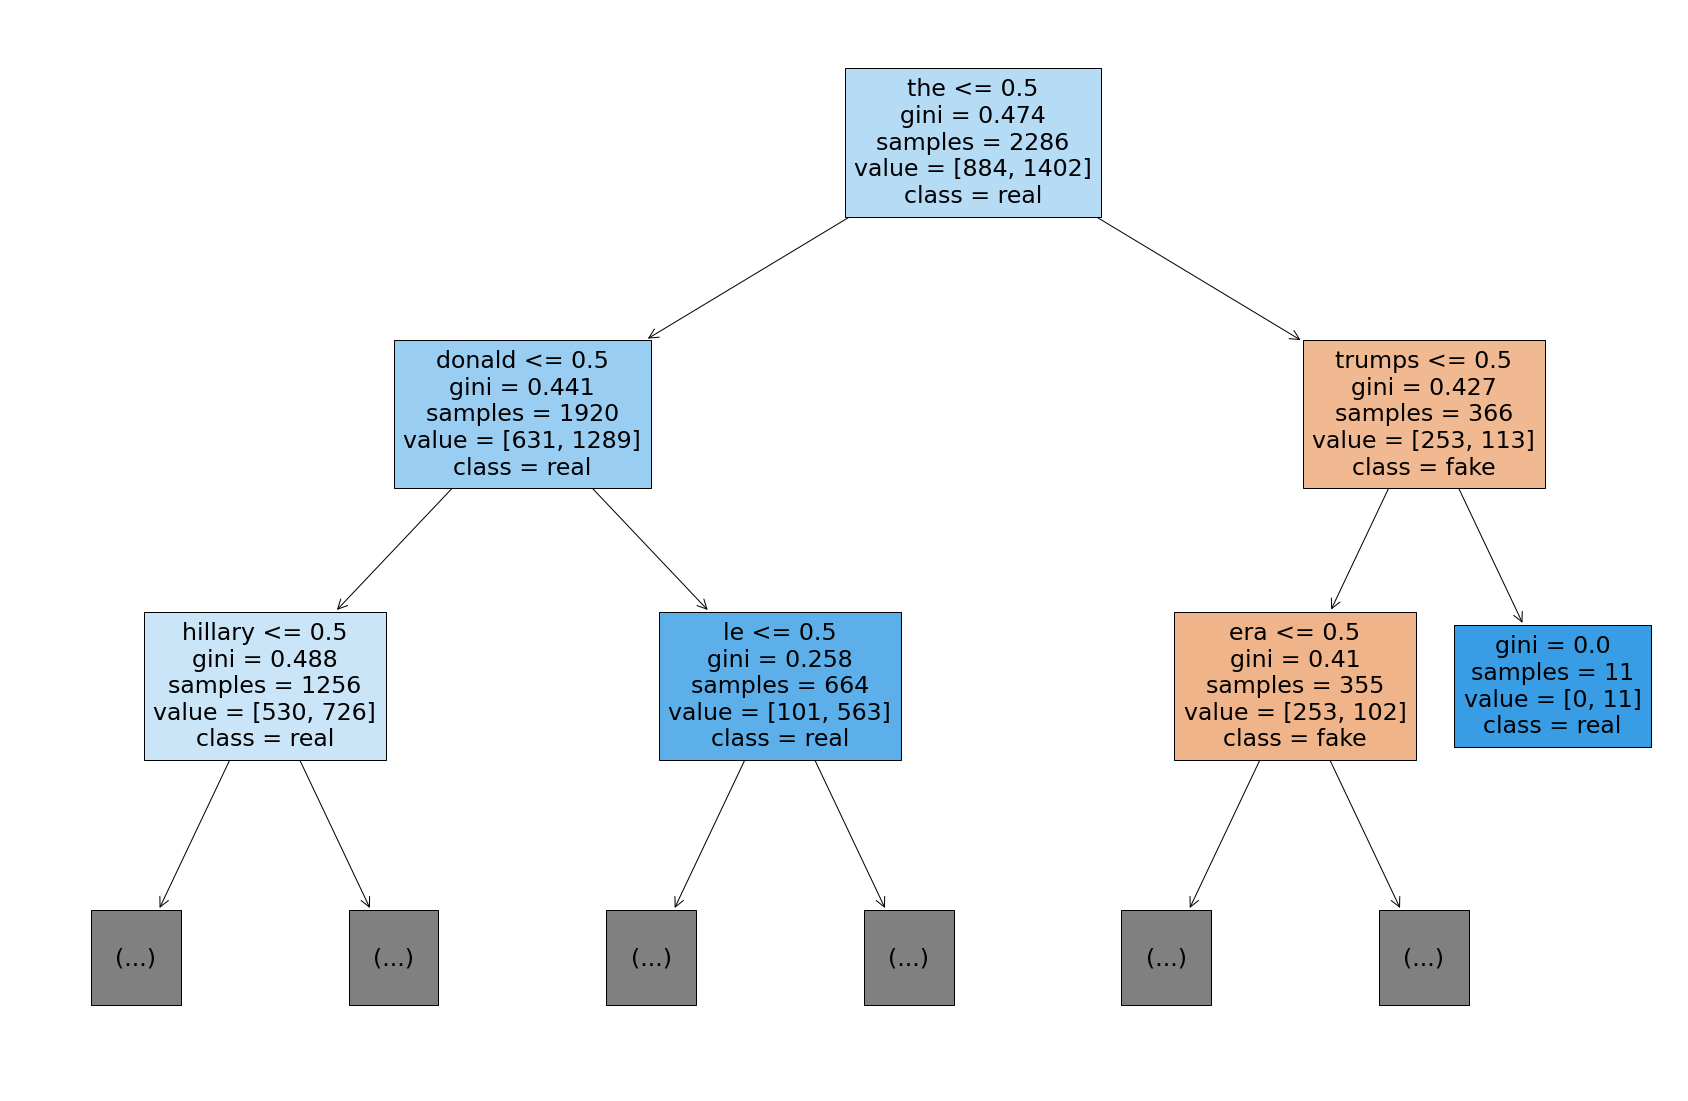

In [11]:
fig = plt.figure(figsize=(30,20))
_ = plot_tree(clf, max_depth=2,
                   feature_names=words,  
                   class_names=clf.classes_,
                   filled=True)

In [12]:
train_data = pd.concat([X_train,y_train], axis=1)
train_data

00  000  10  100  100mln  10m  11  11yo  12  125  ...  zoellick  \
1558   0    0   0    0       0    0   0     0   0    0  ...         0   
435    0    0   0    0       0    0   0     0   0    0  ...         0   
2170   0    0   0    0       0    0   0     0   0    0  ...         0   
237    0    0   0    0       0    0   0     0   0    0  ...         0   
1135   0    0   0    0       0    0   0     0   0    0  ...         0   
...   ..  ...  ..  ...     ...  ...  ..   ...  ..  ...  ...       ...   
1095   0    0   0    0       0    0   0     0   0    0  ...         0   
1130   0    0   0    0       0    0   0     0   0    0  ...         0   
1294   0    0   0    0       0    0   0     0   0    0  ...         0   
860    0    0   0    0       0    0   0     0   0    0  ...         0   
3174   0    0   0    0       0    0   0     0   0    0  ...         0   

      zombies  zone  zones  zu  zuckerberg  zuesse  zulema  zur  data_label  
1558        0     0      0   0           0       0       0    0        real  
435         0     0      0   0           0       0       0    0        fake  
2170        0     0      0   0           0       0       0    0        real  
237         0     0      0   0           0       0       0    0        fake  
1135        0     0      0   0           0       0       0    0        fake  
...       ...   ...    ...  ..         ...     ...     ...  ...         ...  
1095        0     0      0   0           0       0       0    0        fake  
1130        0     0      0   0           0       0       0    0        fake  
1294        0     0      0   0           0       0       0    0        fake  
860         0     0      0   0           0       0       0    0        fake  
3174        0     0      0   0           0       0       0    0        real  

[2286 rows x 5800 columns]

In [13]:
def get_entropy(p0, p1):
    return - p0 * math.log2(p0) - p1 * math.log2(p1)

In [14]:
p_y1 = len(train_data[train_data["data_label"]=="real"])/len(train_data)
p_y0 = len(train_data[train_data["data_label"]=="fake"])/len(train_data)
H_Y = get_entropy(p_y0, p_y1)
H_Y

0.9626379946952659

# (d)

In [26]:
def compute_information_gain(H_Y, split_word):
    word_exists = train_data[train_data[split_word]!=0]
    word_not_exists = train_data[train_data[split_word]==0]
    p_exists = len(word_exists)/len(train_data)
    p_not_exists = len(word_not_exists)/len(train_data)
    p_e_y1 = len(word_exists[word_exists["data_label"]=="real"])/len(word_exists)
    p_e_y0 = len(word_exists[word_exists["data_label"]=="fake"])/len(word_exists)
    p_n_y1 = len(word_not_exists[word_not_exists["data_label"]=="real"])/len(word_not_exists)
    p_n_y0 = len(word_not_exists[word_not_exists["data_label"]=="fake"])/len(word_not_exists)
    H_e_Y = get_entropy(p_e_y0, p_e_y1)
    H_n_Y = get_entropy(p_n_y0, p_n_y1)
    H_X_Y = H_e_Y * p_exists + H_n_Y * p_not_exists
    return H_Y - H_X_Y 

In [27]:
print("The information gain of split on whether '%s' appears in the title is: %f"% ("the", compute_information_gain(H_Y, "the")))
print("The information gain of split on whether '%s' appears in the title is: %f"% ("donald", compute_information_gain(H_Y, "donald")))
print("The information gain of split on whether '%s' appears in the title is: %f"% ("trumps", compute_information_gain(H_Y, "trumps")))
print("The information gain of split on whether '%s' appears in the title is: %f"% ("era", compute_information_gain(H_Y, "era")))
print("The information gain of split on whether '%s' appears in the title is: %f"% ("hillary", compute_information_gain(H_Y, "hillary")))

The information gain of split on whether 'the' appears in the title is: 0.052595
The information gain of split on whether 'donald' appears in the title is: 0.056744
The information gain of split on whether 'trumps' appears in the title is: 0.041687
The information gain of split on whether 'era' appears in the title is: 0.000512
The information gain of split on whether 'hillary' appears in the title is: 0.032244


# (e)

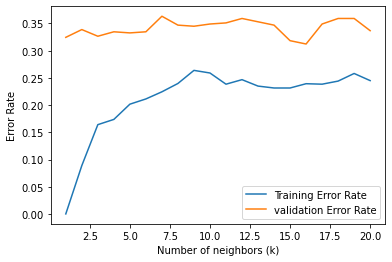

In [21]:
k_list = np.arange(1, 21)
training_error = []
validation_error = []

for k in k_list:
    # training the model
    neigh = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    neigh.fit(X_train, y_train)
    # computing the training error and testing error
    training_accuracy = neigh.score(X_train, y_train)
    validation_accuracy = neigh.score(X_valid, y_valid)
    training_error.append(1 - training_accuracy)
    validation_error.append(1 - validation_accuracy)

# ploting errors to find the suitable k
result = pd.DataFrame({'k': k_list, 'validation_error': validation_error, 'training_error': training_error})
plt.plot(result.k, result.training_error, label='Training Error Rate')
plt.plot(result.k, result.validation_error, label='validation Error Rate')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

In [24]:
neigh_best = KNeighborsClassifier(n_neighbors = 16, metric = 'euclidean')
neigh_best.fit(X_train, y_train)
y_result = neigh_best.predict(X_test)
right_answer_num = 0
for k in X_result == y_test:
    if k == True:
        right_answer_num += 1
accuracy = right_answer_num/len(y_test)

In [25]:
accuracy

0.6693877551020408